In [1]:
import pandas as pd
import numpy as np 
import statsmodels.api as sm
# from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

# import yfinance as yf
from datetime import datetime
# import random

pd.set_option('display.max_columns', None)
# pd.options.display.float_format = '{:.6f}'.format

path = 'data/'

In [2]:
# df = pd.read_csv(path + 'caso_capm.csv')
df = pd.read_csv(path + 'caso_capm.csv', sep='|', decimal=',')
df.shape

(588, 7)

In [3]:
meses = {
    'ene': 'Jan',
    'feb': 'Feb',
    'mar': 'Mar',
    'abr': 'Apr',
    'may': 'May',
    'jun': 'Jun',
    'jul': 'Jul',
    'ago': 'Aug',
    'sep': 'Sep',
    'oct': 'Oct',
    'nov': 'Nov',
    'dic': 'Dec'
}

def convertir_fecha(fecha):
    mes, anio = fecha.split('-')
    anio = '19' + anio
    mes = meses[mes]
    fecha_datetime = datetime.strptime(f'{mes}-{anio}', '%b-%Y')
    return fecha_datetime

In [4]:
df['DATE'] = df['DATE'].apply(convertir_fecha)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     588 non-null    datetime64[ns]
 1   S&P500D  588 non-null    float64       
 2   TBILL    588 non-null    float64       
 3   GM       588 non-null    float64       
 4   GE       588 non-null    float64       
 5   rm -rf   588 non-null    float64       
 6   ge - rf  588 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 32.3 KB


In [6]:
df.head()

,DATE,S&P500D,TBILL,GM,GE,rm -rf,ge - rf
0,1947-01-01,0.021409,0.000306,0.130952,0.090592,0.021103,0.090286
1,1947-02-01,-0.007997,0.000306,0.029474,-0.038339,-0.008304,-0.038645
2,1947-03-01,-0.014704,0.000306,-0.020704,-0.045847,-0.015010,-0.046153
3,1947-04-01,-0.039473,0.000306,-0.021142,-0.021127,-0.039779,-0.021433
4,1947-05-01,-0.001277,0.000306,-0.025918,-0.010791,-0.001583,-0.011097


In [7]:
# S&P500D es la tasa del mercado (RM)
# TBILL es la tasa libre de riesgo (RF) (treasurie bills)
# retornos de GM y GE (Ri y Ri2)
# X = RM - RF
# Y = GE - RF

In [8]:
# Calculo los excesos del mercado (restando el S&P500 a la tasa libre de riesgo)
# Calculo los excesos del activo (restando el GE a la tasa libre de riesgo)

df['X'] = df['S&P500D'] - df['TBILL']
df['Y'] = df['GE'] - df['TBILL']

In [9]:
df.head()

,DATE,S&P500D,TBILL,GM,GE,rm -rf,ge - rf,X,Y
0,1947-01-01,0.021409,0.000306,0.130952,0.090592,0.021103,0.090286,0.021103,0.090286
1,1947-02-01,-0.007997,0.000306,0.029474,-0.038339,-0.008304,-0.038645,-0.008304,-0.038645
2,1947-03-01,-0.014704,0.000306,-0.020704,-0.045847,-0.015010,-0.046153,-0.015010,-0.046153
3,1947-04-01,-0.039473,0.000306,-0.021142,-0.021127,-0.039779,-0.021433,-0.039779,-0.021433
4,1947-05-01,-0.001277,0.000306,-0.025918,-0.010791,-0.001583,-0.011097,-0.001583,-0.011097


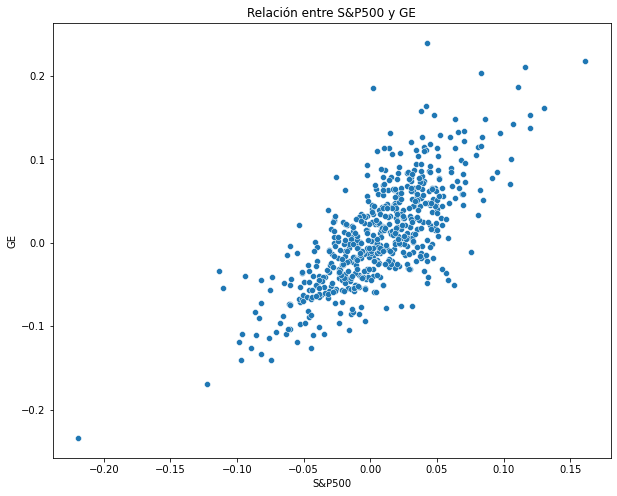

In [10]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='X', y='Y')
plt.xlabel('S&P500')
plt.ylabel('GE')
plt.title('Relación entre S&P500 y GE')
plt.show();

In [11]:
X = sm.add_constant(df['X'])

In [12]:
model = sm.OLS(df['Y'], X).fit()

In [13]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     742.3
Date:                Tue, 20 Jun 2023   Prob (F-statistic):          3.27e-106
Time:                        19:49:14   Log-Likelihood:                 1045.1
No. Observations:                 588   AIC:                            -2086.
Df Residuals:                     586   BIC:                            -2077.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0012      0.002      0.681      0.4

In [14]:
predictions = model.predict(X)

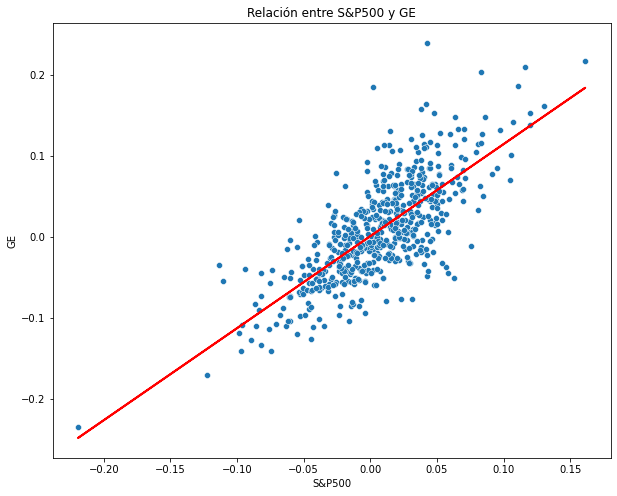

In [15]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='X', y='Y')
plt.plot(df['X'], predictions, color='red', linewidth=2)
plt.xlabel('S&P500')
plt.ylabel('GE')
plt.title('Relación entre S&P500 y GE')
plt.show();